In [90]:
import numpy as np
import matplotlib.pyplot as plt

In order to do Taylor expansions, we need an overview of the first few derivatives.

$$
\begin{align}
\frac{d}{dx}\log{x} &= \frac{1}{x} \\
\frac{d^{2}}{dx^{2}}\log{x} &= -\frac{1}{x^{2}} \\
\frac{d^{3}}{dx^{3}}\log{x} &= \frac{2}{x^{3}}
\end{align}
$$

Then we can show the approximations.

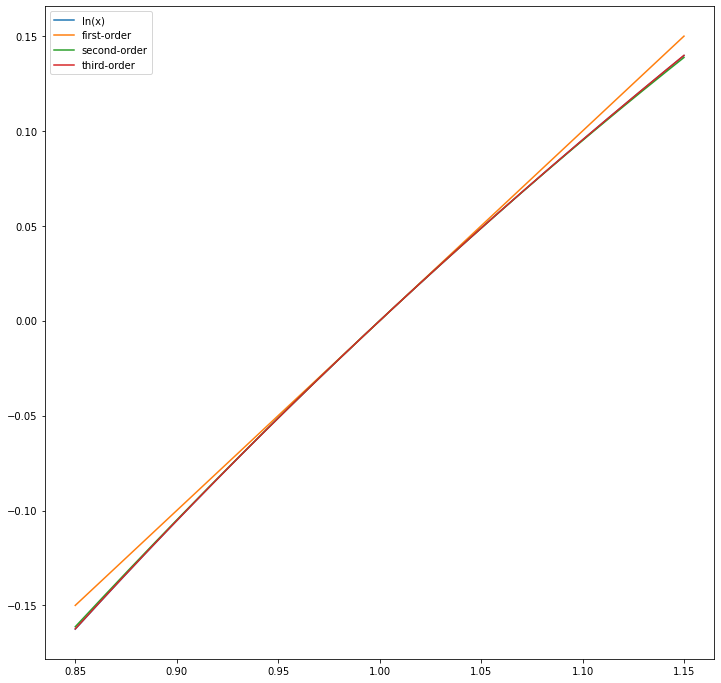

In [91]:
x = np.linspace(0.85,1.15,565)
y = np.log(x)
y1 = np.log(1) + (x - 1)
y2 = np.log(1) + (x - 1) + 1/2 * (-1/1) * (x - 1)**2
y3 = np.log(1) + (x - 1) + 1/2 * (-1/1) * (x - 1)**2 + 1/6 * (2*1) * (x - 1)**3

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(x, y, label="ln(x)")
ax.plot(x, y1, label="first-order")
ax.plot(x, y2, label="second-order")
ax.plot(x, y3, label="third-order")
ax.legend()
plt.show()

Then we can display the relative errors.

/var/folders/wm/41byc5p54bldbc8vsyvc3mg80000gn/T/ipykernel_57573/110347393.py:1: RuntimeWarning: invalid value encountered in divide
  e1 = (y1/y - 1) * 100
/var/folders/wm/41byc5p54bldbc8vsyvc3mg80000gn/T/ipykernel_57573/110347393.py:2: RuntimeWarning: invalid value encountered in divide
  e2 = (y2/y - 1) * 100
/var/folders/wm/41byc5p54bldbc8vsyvc3mg80000gn/T/ipykernel_57573/110347393.py:3: RuntimeWarning: invalid value encountered in divide
  e3 = (y3/y - 1) * 100


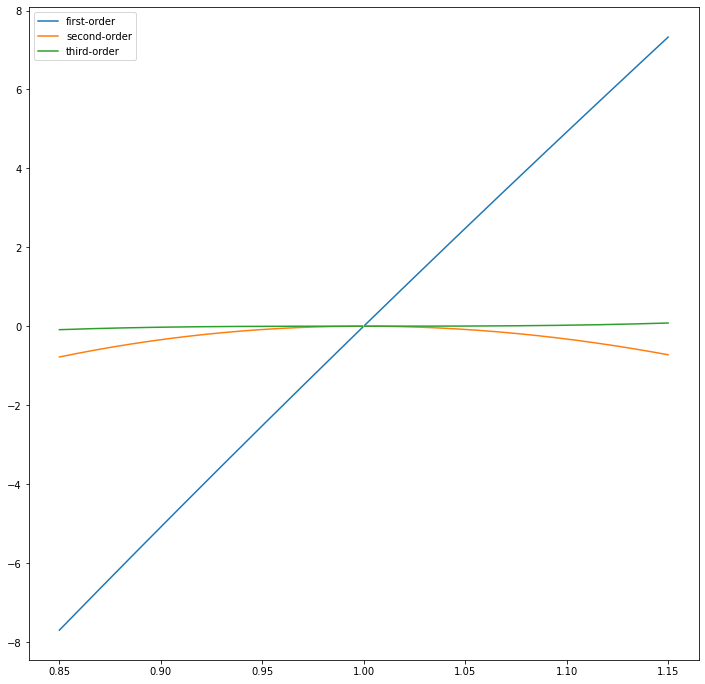

In [93]:
e1 = (y1/y - 1) * 100
e2 = (y2/y - 1) * 100
e3 = (y3/y - 1) * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(x, e1, label="first-order")
ax.plot(x, e2, label="second-order")
ax.plot(x, e3, label="third-order")
ax.legend()
plt.show()

The idea of introducing the Taylor expansion is to penalize deviations from the compounded returns of the benchmark. To illustrate why this may help consider the following experiment.

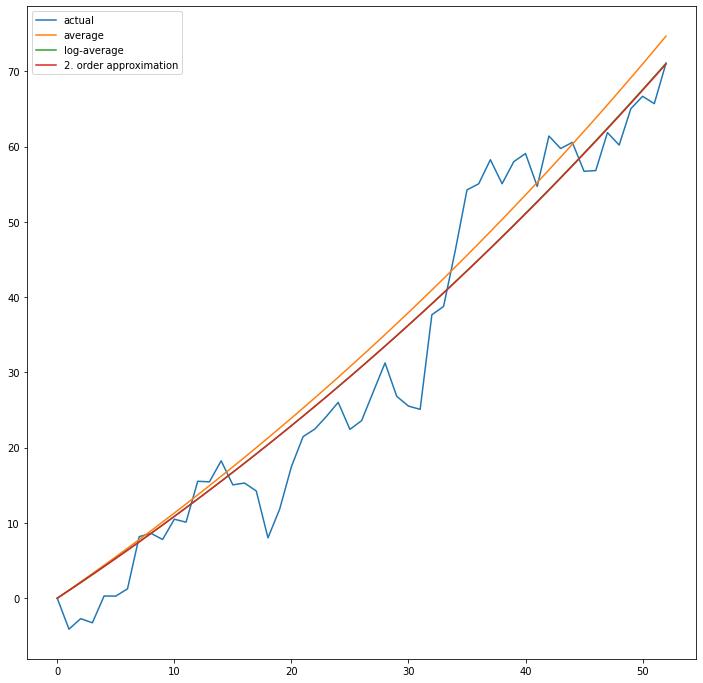

In [88]:
testData = np.random.normal(loc=(1 + 0.01), scale=0.03, size=52)
testReturns = np.concatenate((np.array([1]), testData))
testReturns = (np.cumprod(testReturns) - 1) * 100
normalAverage = (np.array([np.mean(testData)**i for i in range(0,53)]) - 1) * 100
logAverage = (np.array([np.exp(np.mean(np.log(testData)))**i for i in range(0,53)]) - 1) * 100
secondApprox = (np.array([np.exp(np.mean((testData - 1) + 1/2 * (-1/1) * (testData - 1)**2))**i for i in range(0,53)]) - 1) * 100

x = np.arange(0,53,1)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(x, testReturns, label="actual")
ax.plot(x, normalAverage, label="average")
ax.plot(x, logAverage, label="log-average")
ax.plot(x, secondApprox, label="2. order approximation")
ax.legend()
plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])